In [140]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%pylab
# %pylab inline

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


In [184]:
def getinput():
    X=pd.read_csv("../data/ex3Data/ex3x.dat", header= None, names= [ "data"])
    y=pd.read_csv("../data/ex3Data/ex3y.dat", header= None, names= ['Price'])
    numberExamples=len(y)
    return(X,y,numberExamples)

In [418]:
data=getinput()
meta=data[0]["data"]
meta=[x.split() for x in meta]
meta=[list(map(lambda x: float(x),i)) for i in meta]
X=np.array(meta)
Y=np.array(data[1])

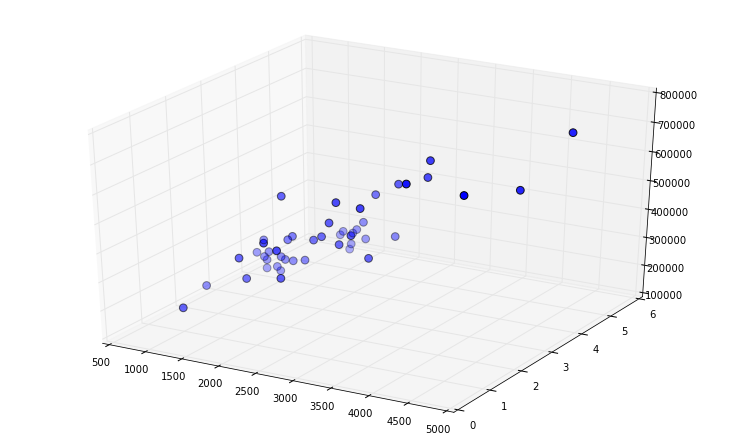

In [101]:
ax = Axes3D(plt.gcf())
ax.scatter(X.T[0], X.T[1], zs=Y, zdir='z', s=60, c='b', depthshade=True)
figsize(10,6)

In [419]:
m=data[2]
n=3
X=np.c_[np.ones((m)),X]
thetha=np.zeros((n,1))

In [335]:
def rescaling(x):
    std_size=np.std(x)
    mean_size=np.mean(x)
    XT=(x-mean_size)/std_size
    return XT

In [439]:
std=np.std(X,axis=0)
mu=np.mean(X,axis=0)
newX=np.copy(X)
newX[:,1]=(X[:,1]-mu[1])/std[1]
newX[:,2]=(X[:,2]-mu[2])/std[2]

In [363]:
def cost_evaluate(X,y, thetha, m):
    h=np.dot(X,thetha)
    J=np.dot((h-y).T,(h-y))/(2*m)
    return J[0],h

In [364]:
Jfirst,h=cost_evaluate(newX,Y, thetha, m)

In [365]:
def gradient_evaluate(X,y,thetha,m,Jold,alpha):
    J={}
    h=np.dot(X,thetha)
    for i in xrange(100):
            J[i]=Jold
            thetha=thetha-((np.dot(X.T,(h-y))*alpha)/m)
            Jnew,h=cost_evaluate(X,y, thetha,m)
            if abs(Jold-Jnew)<0.0001:
                break
            else:
                Jold=Jnew
    return thetha,J

In [428]:
thee,J1=gradient_evaluate(newX,Y,thetha,m,Jfirst,0.01)

In [429]:
thee,J2=gradient_evaluate(newX,Y,thetha,m,Jfirst,0.03)

In [430]:
thee,J3=gradient_evaluate(newX,Y,thetha,m,Jfirst,0.06)

In [431]:
thee,J4=gradient_evaluate(newX,Y,thetha,m,Jfirst,0.09)

In [434]:
thee,J7=gradient_evaluate(newX,Y,thetha,m,Jfirst,0.18)


In [436]:
thee,J9=gradient_evaluate(newX,Y,thetha,m,Jfirst,0.30)

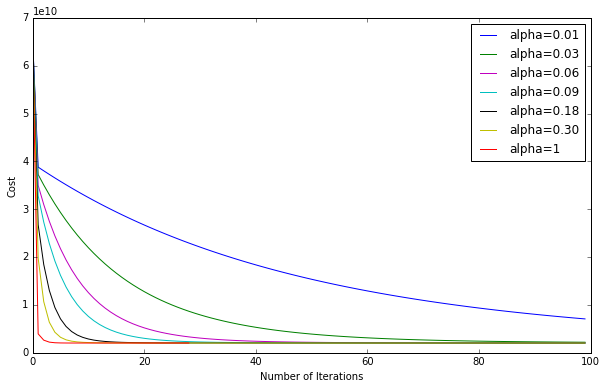

In [471]:
Thetha,J10=gradient_evaluate(newX,Y,thetha,m,Jfirst,1)
a, =plt.plot(J1.keys(),J1.values(), color = 'b',label="alpha=0.01")
b, =plt.plot(J2.keys(),J2.values(), color = 'g',label="alpha=0.03")
c, =plt.plot(J3.keys(),J3.values(), color = 'm',label="alpha=0.06")
d, =plt.plot(J4.keys(),J4.values(), color = 'c',label="alpha=0.09")
e, =plt.plot(J7.keys(),J7.values(), color = 'k',label="alpha=0.18")
f, =plt.plot(J9.keys(),J9.values(), color = 'y',label="alpha=0.30")
g, =plt.plot(J10.keys(),J10.values(), color = 'r',label="alpha=1")
plt.legend(handles=[a,b,c,d,e,f,g])
plt.ylabel('Cost')
plt.xlabel('Number of Iterations')

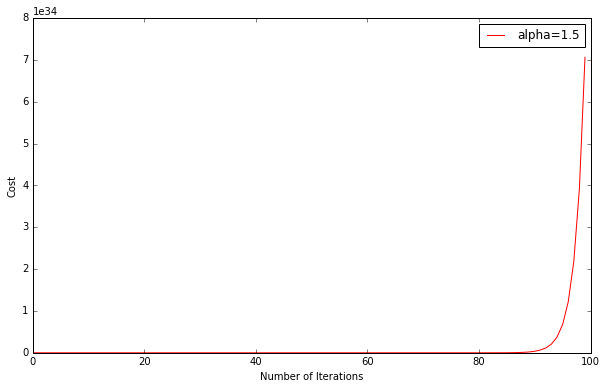

In [472]:
#Very large thetha
Thetha,J10=gradient_evaluate(newX,Y,thetha,m,Jfirst,1.5)
h, =plt.plot(J10.keys(),J10.values(), color = 'r',label="alpha=1.5")
plt.legend(handles=[h])
plt.ylabel('Cost')
plt.xlabel('Number of Iterations')

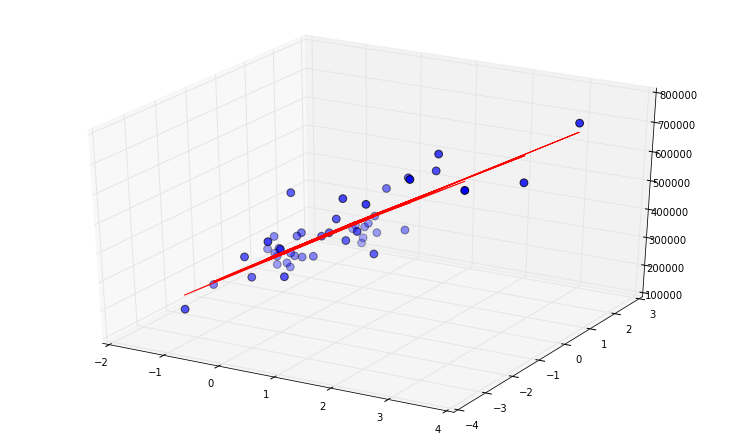

In [437]:
ax = Axes3D(plt.gcf())
ax.scatter(newX.T[1], newX.T[2], zs=Y, zdir='z', s=60, c='b', depthshade=True)
y1 = Thetha[0]*newX.T[0]+ Thetha[1]* newX.T[1]+ Thetha[2]*newX.T[2]
ax.plot(newX.T[1], newX.T[2],zs=y1,zdir='z', color = 'r')
figsize(10,6)

In [445]:
x2=(3-mu[2])/std[2]
x1=(1650-mu[1])/std[1]

In [452]:
Thetha

array([[ 340412.65957447],
       [ 109447.79657707],
       [  -6578.34941703]])

In [448]:
output = Thetha[0]*[1]+ Thetha[1]*x1+ Thetha[2]*x2

In [449]:
output

array([ 293081.46305768])

In [450]:
#Normal Equations
thetha=np.dot(np.linalg.inv(np.dot(X.T,X)),np.dot(X.T,Y))

In [451]:
thetha

array([[ 89597.9095428 ],
       [   139.21067402],
       [ -8738.01911233]])

In [453]:
output = thetha[0]*[1]+ thetha[1]*[1650]+ thetha[2]*[3]

In [454]:
output

array([ 293081.4643349])